In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import sklearn as sk
from sklearn.metrics import mean_squared_error
from math import sqrt

In [106]:
df = pd.read_excel('Final_clean_data.xlsx')
display(df)

,ETL_C60,ETL_C60 | BCP,ETL_PAA | PCBM-60 | BCP,ETL_PCBM-60,ETL_PCBM-60 | BCP,ETL_SnO2-c,ETL_SnO2-np,ETL_TiO2-c,ETL_TiO2-c | PCBM-60,ETL_TiO2-c | TiO2-mp,...,PSK_additives_Undoped,PSK_additives_nan,NIP,PIN,JV_scan_speed,PCE,Voc,Jsc,FF,Hystersis_index
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,125.0,0.00042,0.010,0.700,0.060,1.000000
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,50.0,0.03010,0.542,0.165,0.336,0.239203
2,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.06000,0.870,0.380,0.180,0.166667
3,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.07000,0.880,0.480,0.170,0.142857
4,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.09000,0.890,0.620,0.160,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,20.0,20.83000,1.138,23.670,0.770,0.017763
1225,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,40.0,21.09000,1.088,23.997,0.807,0.020863
1226,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,40.0,21.02000,1.074,24.317,0.805,0.009515
1227,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,10.0,21.54000,1.186,23.250,0.782,0.030641


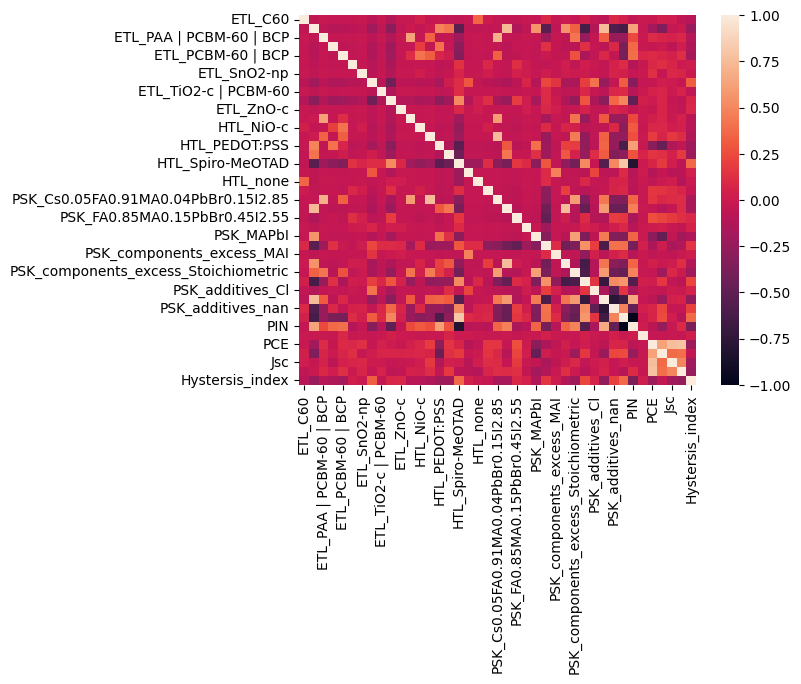

In [107]:
cor = df.corr()['Hystersis_index']
cormatrix = df.corr()
sn.heatmap(cormatrix)
plt.show()
#print(cor)
Cor = pd.DataFrame(cor)
#Cor.to_clipboard()
#cormatrix.to_clipboard()

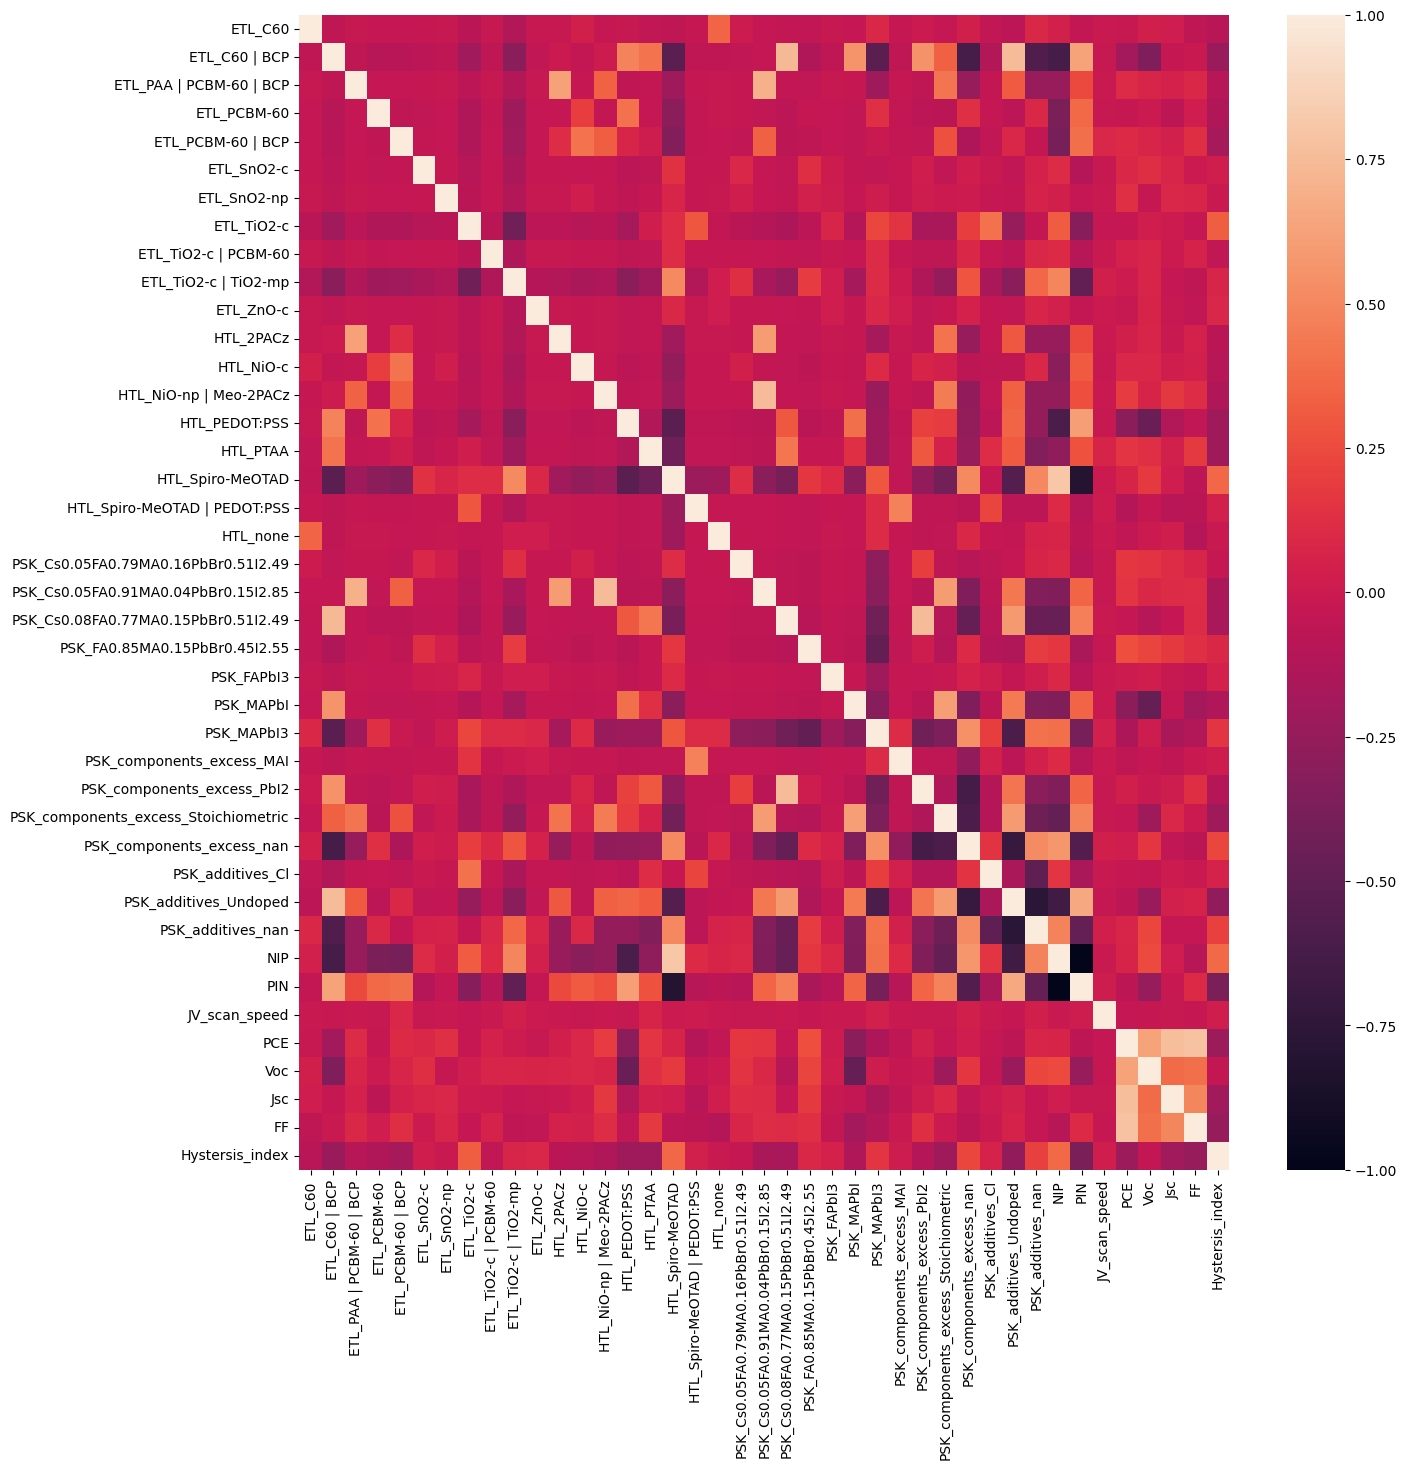

In [108]:
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(cormatrix)
plt.show()

In [109]:
print(cor)

ETL_C60                                -0.089347
ETL_C60 | BCP                          -0.233629
ETL_PAA | PCBM-60 | BCP                -0.097700
ETL_PCBM-60                            -0.129962
ETL_PCBM-60 | BCP                      -0.176414
ETL_SnO2-c                              0.027585
ETL_SnO2-np                            -0.008414
ETL_TiO2-c                              0.323912
ETL_TiO2-c | PCBM-60                   -0.054434
ETL_TiO2-c | TiO2-mp                    0.075390
ETL_ZnO-c                               0.084957
HTL_2PACz                              -0.083984
HTL_NiO-c                              -0.098683
HTL_NiO-np | Meo-2PACz                 -0.135098
HTL_PEDOT:PSS                          -0.204754
HTL_PTAA                               -0.208299
HTL_Spiro-MeOTAD                        0.363791
HTL_Spiro-MeOTAD | PEDOT:PSS            0.042652
HTL_none                               -0.008332
PSK_Cs0.05FA0.79MA0.16PbBr0.51I2.49    -0.029486
PSK_Cs0.05FA0.91MA0.

In [110]:
X,y = df.drop('Hystersis_index', axis=1), df['Hystersis_index']

from sklearn.model_selection import train_test_split
# Split the data into training and temporary sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [34]:
#Optimisation of RF model through Gird Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the parameter grid
param_grid = {
    'n_estimators': [20,40,100,500,1000],  # Number of trees in the forest
    'max_depth': [30,40,50,60],  # Maximum depth of the tree
    'min_samples_split': [30,40,50,60],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1,2,3,4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True]  # Method of selecting samples for training each tree
}
# Create a base model
rfm = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
{'bootstrap': True, 'max_depth': 40, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 20}


In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap = True, max_depth = 40, min_samples_leaf = 3, min_samples_split = 30, n_estimators = 35)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))

y_pred_train = rf.predict(X_train)
print(sqrt(mean_squared_error(y_pred_train,y_train)))

0.5778806515738653
0.10233037234866131


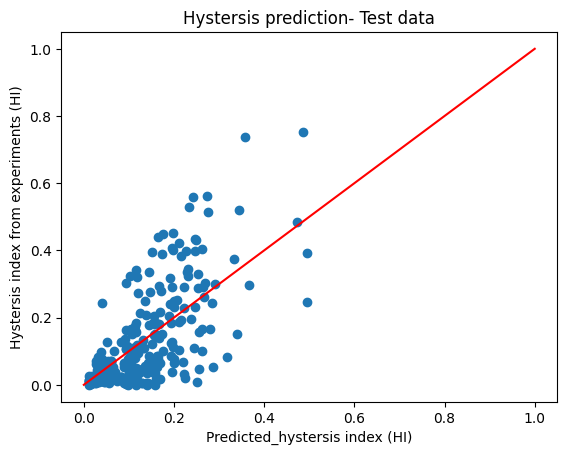

In [69]:
y_pred = rf.predict(X_test)
plt.scatter(y_pred,y_test)
lim1,lim2 = 0,1
xlim,ylim = [lim1,lim2], [lim1,lim2]
#plt.xlim(lim1,lim2)
#plt.ylim(lim1,lim2)
plt.plot(xlim,ylim, color = 'r')
plt.title('Hystersis prediction- Test data')
plt.xlabel('Predicted_hystersis index (HI)')
plt.ylabel('Hystersis index from experiments (HI)')
plt.show()

In [75]:
print(rf.score(X_test,y_test))
print(sqrt(mean_squared_error(y_pred,y_test)))

0.4440701281113223
0.10742139725541053


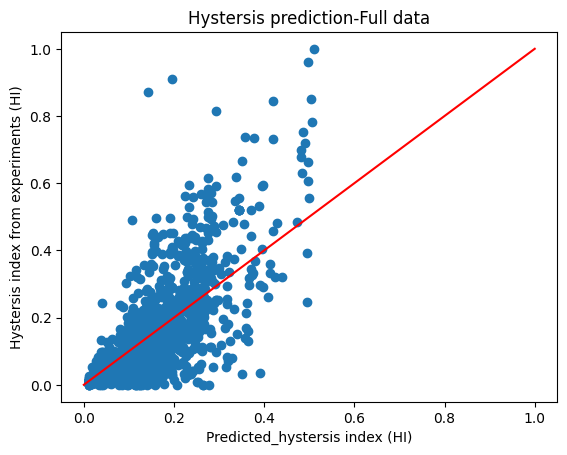

In [81]:
y_fullpred = rf.predict(X)
y_fullpredictionDataframe = pd.DataFrame(y_fullpred)
y_fullpredictionDataframe.to_clipboard()
plt.scatter(y_fullpred,y)
lim1,lim2 = 0,1
xlim,ylim = [lim1,lim2], [lim1,lim2]
#plt.xlim(lim1,lim2)
#plt.ylim(lim1,lim2)
plt.plot(xlim,ylim, color = 'r')
plt.title('Hystersis prediction-Full data')
plt.xlabel('Predicted_hystersis index (HI)')
plt.ylabel('Hystersis index from experiments (HI)')
plt.show()

In [74]:
print(rf.score(X,y))
print(sqrt(mean_squared_error(y_fullpred,y)))

0.5160430040883603
0.10830217556604313


Plotting HI vs various parameters

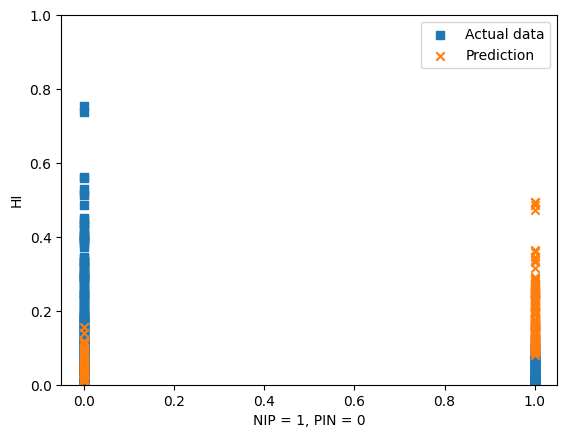

In [76]:
plt.scatter(X_test['PIN'],y_test, label = 'Actual data', marker= 's')
plt.scatter(X_test['NIP'],y_pred, label = 'Prediction', marker='x')
plt.ylim(0,1)
plt.legend()
plt.xlabel('NIP = 1, PIN = 0')
plt.ylabel('HI')
plt.show()

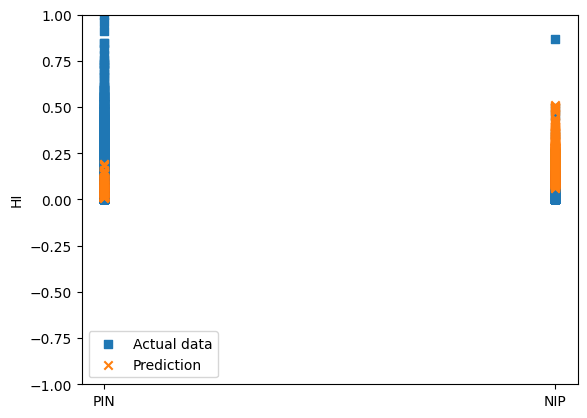

In [77]:

# Assuming 'labels' contains the labels for 0 and 1
labels = ['PIN', 'NIP']

# Your existing code for scatter plot
plt.scatter(X['PIN'], y, label='Actual data', marker='s')
plt.scatter(X['NIP'], y_fullpred, label='Prediction', marker='x')

# Set y-axis limits
plt.ylim(-1, 1)

# Set x-axis tick labels
plt.xticks([0, 1], labels)

# Add labels, legend, and show plot
plt.legend()
plt.ylabel('HI')
plt.show()

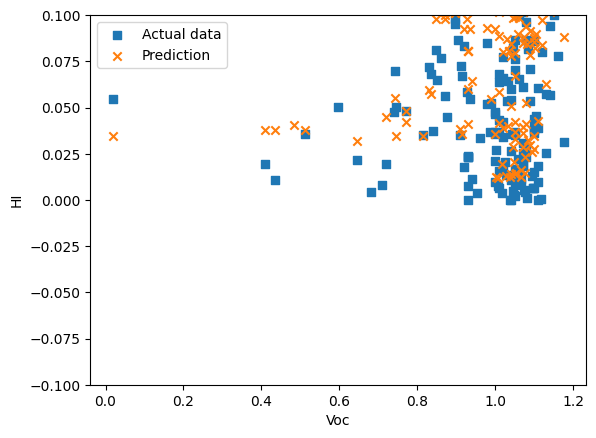

In [50]:
plt.scatter(X_test['Voc'],y_test, label = 'Actual data', marker= 's')
plt.scatter(X_test['Voc'],y_pred, label = 'Prediction', marker='x')
plt.ylim(-0.1,0.1)
plt.xlabel('Voc')
plt.ylabel('HI')
plt.legend()
plt.show()

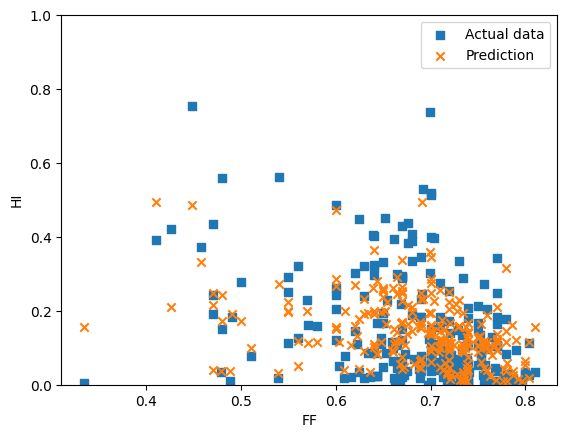

In [78]:
plt.scatter(X_test['FF'],y_test, label ='Actual data', marker='s')
plt.scatter(X_test['FF'], y_pred, label='Prediction', marker='x')
plt.ylim(0,1)
plt.xlabel('FF')
plt.ylabel('HI')
plt.legend()
plt.show()

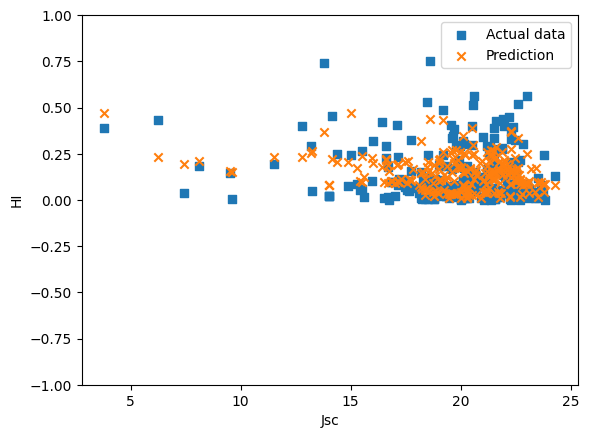

In [52]:
plt.scatter(X_test['Jsc'],y_test, label ='Actual data', marker='s')
plt.scatter(X_test['Jsc'], y_pred, label='Prediction', marker='x')
plt.ylim(-1,1)
plt.xlabel('Jsc')
plt.ylabel('HI')
plt.legend()
plt.show()

In [116]:
y.to_clipboard()